In [2]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("historical_applications.csv")

le_history = LabelEncoder()
le_location = LabelEncoder()
le_coverage = LabelEncoder()
le_risk = LabelEncoder()

df["history_enc"] = le_history.fit_transform(df["history"])
df["location_enc"] = le_location.fit_transform(df["location"])
df["coverage_enc"] = le_coverage.fit_transform(df["coverage"])
df["risk_enc"] = le_risk.fit_transform(df["risk_level"])

X = df[['age', 'history_enc', 'location_enc', 'coverage_enc', 'accidents_count']]
y = df['risk_enc']

X.head()


,age,history_enc,location_enc,coverage_enc,accidents_count
0,25,0,5,1,0
1,35,1,2,2,1
2,50,2,1,0,3
3,28,0,0,1,0
4,40,1,4,2,1


In [3]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("historical_applications.csv")

le_history = LabelEncoder()
le_location = LabelEncoder()
le_coverage = LabelEncoder()
le_risk = LabelEncoder()

df["history_enc"] = le_history.fit_transform(df["history"])
df["location_enc"] = le_location.fit_transform(df["location"])
df["coverage_enc"] = le_coverage.fit_transform(df["coverage"])
df["risk_enc"] = le_risk.fit_transform(df["risk_level"])

X = df[['age', 'history_enc', 'location_enc', 'coverage_enc', 'accidents_count']]
y = df['risk_enc']

X.head()


,age,history_enc,location_enc,coverage_enc,accidents_count
0,25,0,5,1,0
1,35,1,2,2,1
2,50,2,1,0,3
3,28,0,0,1,0
4,40,1,4,2,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [5]:
import joblib

joblib.dump(model, "risk_model.pkl")
joblib.dump(le_history, "le_history.pkl")
joblib.dump(le_location, "le_location.pkl")
joblib.dump(le_coverage, "le_coverage.pkl")
joblib.dump(le_risk, "le_risk.pkl")


['le_risk.pkl']

In [6]:
model = joblib.load("risk_model.pkl")
le_history = joblib.load("le_history.pkl")
le_location = joblib.load("le_location.pkl")
le_coverage = joblib.load("le_coverage.pkl")
le_risk = joblib.load("le_risk.pkl")

new_customer = {
    "age": 30,
    "history": "clean",
    "location": "Delhi",
    "coverage": "Comprehensive",
    "accidents_count": 0
}

features = [
    new_customer["age"],
    le_history.transform([new_customer["history"]])[0],
    le_location.transform([new_customer["location"]])[0],
    le_coverage.transform([new_customer["coverage"]])[0],
    new_customer["accidents_count"]
]

risk_enc = model.predict([features])[0]
risk_label = le_risk.inverse_transform([risk_enc])[0]

print("Predicted Risk:", risk_label)


Predicted Risk: low


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
base_rate = 5000

risk_multiplier = {
    "low": 1.0,
    "medium": 1.5,
    "high": 2.0
}

coverage_factor = {
    "Liability": 1.0,
    "Collision": 1.2,
    "Comprehensive": 1.5
}

premium = (
    base_rate *
    risk_multiplier[risk_label] *
    coverage_factor[new_customer["coverage"]]
)

premium


7500.0

In [10]:
def llm_explain_quote(customer, risk, premium):
    return f"""
AI Insurance Quote Summary

Customer Details:
- Age: {customer['age']}
- Location: {customer['location']}
- Coverage: {customer['coverage']}
- Previous Accidents: {customer['accidents_count']}

Risk Assessment:
Based on historical insurance data, the AI model classified this profile as **{risk.upper()} RISK**.

Premium Calculation:
- Base Rate: ₹{base_rate}
- Risk Multiplier: {risk_multiplier[risk]}
- Coverage Factor: {coverage_factor[customer['coverage']]}

Final Premium Amount: ₹{premium}

This quote is generated automatically using AI to ensure speed, fairness, and accuracy.
"""
print(llm_explain_quote(new_customer, risk_label, premium))




AI Insurance Quote Summary

Customer Details:
- Age: 30
- Location: Delhi
- Coverage: Comprehensive
- Previous Accidents: 0

Risk Assessment:
Based on historical insurance data, the AI model classified this profile as **LOW RISK**.

Premium Calculation:
- Base Rate: ₹5000
- Risk Multiplier: 1.0
- Coverage Factor: 1.5

Final Premium Amount: ₹7500.0

This quote is generated automatically using AI to ensure speed, fairness, and accuracy.



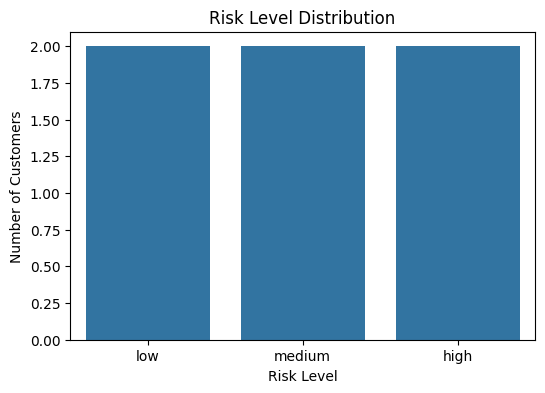

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=df['risk_level'])
plt.title("Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Customers")
plt.show()


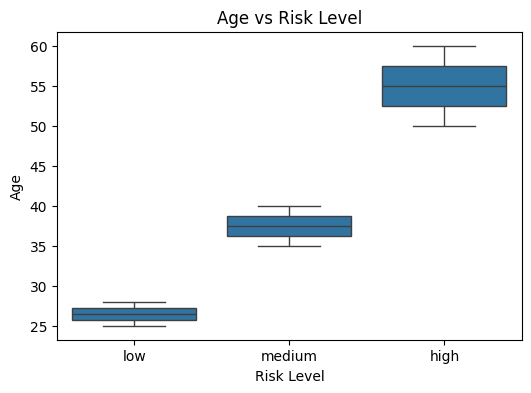

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='risk_level', y='age', data=df)
plt.title("Age vs Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Age")
plt.show()


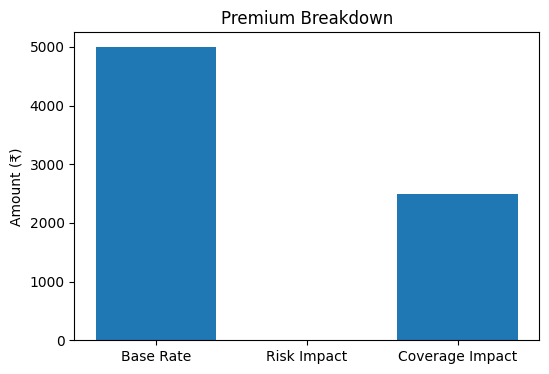

In [14]:
labels = ['Base Rate', 'Risk Impact', 'Coverage Impact']
values = [
    base_rate,
    base_rate * (risk_multiplier[risk_label] - 1),
    base_rate * risk_multiplier[risk_label] * (coverage_factor[new_customer['coverage']] - 1)
]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("Premium Breakdown")
plt.ylabel("Amount (₹)")
plt.show()


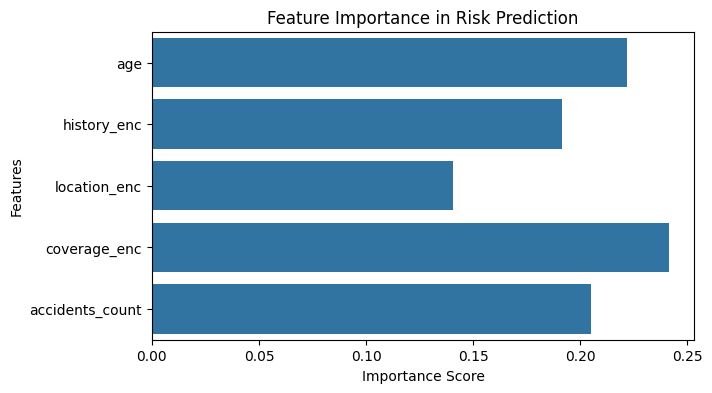

In [15]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
